# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_response}.")      

The weather API responded with: <Response [200]>.


In [12]:
# set lists for the dataframe
city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
# Print Ending Log Statement
print(f"-------------------------------")

Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | asau
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | tabou
Processing Record 9 of Set 1 | saint-francois
Processing Record 10 of Set 1 | mecca
City not found. Skipping...
Processing Record 11 of Set 1 | ulladulla
Processing Record 12 of Set 1 | banepa
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | pochutla
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 17 of Set 1 | tougue
Processing Record 18 of Set 1 | xichang
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | luganville
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | liverpool
Proces

Processing Record 41 of Set 4 | manacor
Processing Record 42 of Set 4 | anloga
Processing Record 43 of Set 4 | bintulu
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | airai
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | doha
Processing Record 1 of Set 5 | roma
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | villamontes
Processing Record 4 of Set 5 | khatanga
City not found. Skipping...
Processing Record 5 of Set 5 | san lorenzo
Processing Record 6 of Set 5 | mogadishu
Processing Record 7 of Set 5 | lishui
City not found. Skipping...
Processing Record 8 of Set 5 | cervo
Processing Record 9 of Set 5 | moree
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 5 | saldanha
Processing Record 11 of Set 5 | saskylakh
Processing Record 12 of Set 5 | okha
P

Processing Record 21 of Set 8 | jacareacanga
Processing Record 22 of Set 8 | ota
Processing Record 23 of Set 8 | zhigansk
Processing Record 24 of Set 8 | krasnoselkup
Processing Record 25 of Set 8 | port-gentil
Processing Record 26 of Set 8 | coahuayana
Processing Record 27 of Set 8 | gornopravdinsk
Processing Record 28 of Set 8 | puri
Processing Record 29 of Set 8 | pingliang
Processing Record 30 of Set 8 | skogn
Processing Record 31 of Set 8 | malatya
Processing Record 32 of Set 8 | saint-augustin
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | sorland
Processing Record 35 of Set 8 | valkeakoski
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | dossor
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | waipawa
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | beira
Processing Record 42 of Set 8 | inuvik
Processing Record 43 of Set 8 | kenai
City not found. Skipping...
Processing Record 44 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Create a DataFrame
weather_dict = {
    "City": city_name,
    "Country": countries,
    "Date": dates,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()



City               519
Country            519
Date               519
Latitude           519
Longitude          519
Max Temperature    519
Humidity           519
Cloudiness         519
Wind Speed         519
dtype: int64

In [42]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,tautira,PF,1596608887,-17.73,-149.15,26.00,69,20,2.1
1,butaritari,KI,1596608887,3.07,172.79,28.64,77,87,6.7
2,dikson,RU,1596608888,73.51,80.55,8.29,91,47,9.7
3,ushuaia,AR,1596608865,-54.80,-68.30,9.00,39,40,2.1
4,asau,RO,1596608888,46.43,26.40,21.11,68,0,3.1


In [43]:
# output data to csv
weather_data.to_csv("./output_data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#weather_data["Humidity"] = weather_data["Humidity"]>=100


NameError: name 'Aweather_data' is not defined

In [45]:
#  Get the indices of cities that have humidity over 100%.


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

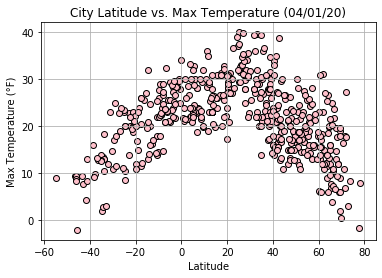

In [47]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="pink", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


## Latitude vs. Humidity Plot

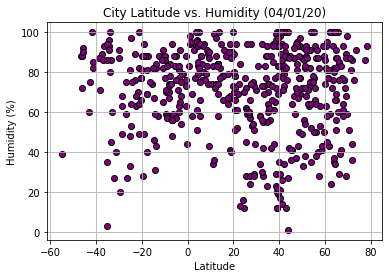

In [48]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="purple", marker="o", edgecolor="black")
# Incorporate Other Graph Properties

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

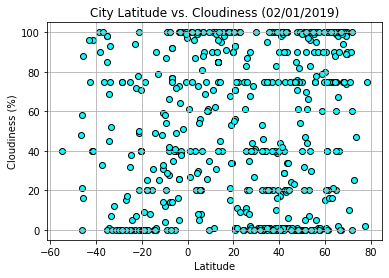

In [51]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="aqua", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

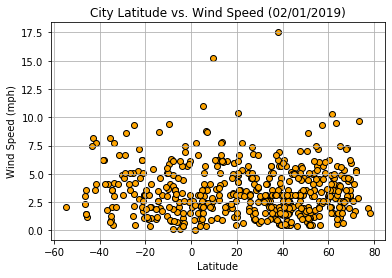

In [50]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()



## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
